# GARCH模型

## 原理讲解
### GARCH 模型
在 ARCH ( $p$ )模型中，如果 $p$ 很大，则要估计很多参数，会损失样本容量。Bollerslev（1986）提出 GARCH，使得待估计参数减少，而对未来条件方差的预测更加准确。其基本思想是，在 ARCH 模型的基础上，再加上 $\sigma_{t}^{2}$ 的自同归部分， 即 $\sigma_{t}^{2}$ 还是 $\left\{\boldsymbol{\sigma}_{t-1}^{2}, \cdots, \sigma_{t-p}^{2}\right\}$ 的函数。 GARCH $(p,$ $q$ ) 的模型设定为：

$$\sigma_{t}^{2}=\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}+\cdots+\alpha_{q} \varepsilon_{t-q}^{2}+\gamma_{1} \sigma_{t-1}^{2}+\cdots+\gamma_{p} \sigma_{t-p}^{2}\tag{1}$$

其中，p 为 $\sigma_{t}^{2}$ 的自回归阶数，而 $q$ 为 $\varepsilon_{t}^{2}$ 的滞后阶数。称 $\varepsilon_{t-i}^{2}$ 为“ARCH 项”，而称 $\sigma_{t-i}^{2}$ 为“GARCH 项”。

### 何时使用 ARCH 或 GARCH 模型
* 首先，用 OLS 估计原方程“ $y_{t}=x_{t}^\prime \boldsymbol{\beta}+\varepsilon_{t}$，得到残差序列 $\left\{e_{t}\right\}_{\circ}$ 其次，用 $0 \mathrm{LS}$ 估计辅助同归 $, e_{t}^{2}=\alpha_{0}+\alpha_{1} e_{t-1}^{2}+\cdots+\alpha_{p} e_{t-p}^{2}+e r r o r_{t},$ 并检验原假设“ $H_{0}: \alpha_{1}=\alpha_{2}=\cdots=\alpha_{p}=0 "($ 不存在条件异方差 )。Engle（1982）提出进行 LM 检验，其检验统计量为 $T R^{2} \stackrel{d}{\longrightarrow} \chi^{2}(p)$，其中 $T$ 为样本 容量， $R^{2}$ 为上述辅助同归的可决系数。如果拒绝 $H_{0},$ 则认为应使用 ARCH 或 GARCH 模型。

* 可以对残差平方序列 $\left|e_{t}^{2}\right|$ 进行 $Q$ 检验, $,$ 检验其序列相关性。如果 $\left\{e_{t}^{2}\right\}$ 存在自相关,则认为 $\varepsilon_{t}$ 存在条件异方差。

* 最为直接的方法是,在估计 ARCH 或 GARCH 模型之后,看条件方差方程中的系数 （即所有 $\alpha$ 与 $\gamma$ ) 是否显著。

### ARCH 与 GARCH 模型的扩展
* ARCH-M：金融理论认为，金融资产的风险越高，其期望收益率也应该越高，这样才会有人愿意持有它。超出正常期望收益率的部分，称为"风险溢价"(riskpremium)。但在标准的 ARCH 模型中，变量的均值与条件方差却没有关系。Engle，Lilien and Robins (1987)提出了如下"ARCH - in - Mean 模型"(简记 ARCH - M)。

* TARCH："坏消息"对资产价格波动性的影响可能大于好消息的影响。Glosten，Jagannathanand Runkle ( 1993)提出了非对称( asymmetric)的"门限 GARCH"模型( Threshold GARCH，简记 TARCH)。

* EGARCH：在标准的 GARCH 模型中，对参数的取值有所限制，给 MLE 估计带来不便。为此，使用对数形式的条件方差方程

* 带 ARMA 的 GARCH

* 在条件方差方程中引入解释变量

* 使用非正态扰动项

## KS 检验与QQ 图原理讲解
### KS 检验
Kolmogorov-Smirnov 检验是基于累计分布函数的，用于检验一个分布是否符合某种理论分布或比较两个经验分布是否有显著差异。

单样本 K-S 检验是用来检验一个数据的观测经验分布是否符合已知的理论分布。

两样本 K-S 检验由于对两样本的经验分布函数的位置和形状参数的差异都敏感，所以成为比较两样本的最有用且最常用的非参数方法之一。



### QQ 图原理
任何分布都能化为 [0, 1] 均匀分布

假设 $F_{X}(a)=p(x \leq a)$ 为累积分布函数，$f(x)$ 为概率密度函数， $F_{X}(a)=\int_{-\infty}^{a} f(x) d x,$ 则存在如下等式:

$$P\left(F_{X}(X) \leq a\right)=P\left(X \leq F_{X}^{-1}(a)\right)=F_{X}\left(F_{X}^{-1}(a)\right)=a\tag{2}$$

则累积分布函数 $Y=F_{X}(X)$ 服从 [0, 1] 间的均匀分布。

## arch 模块实现

In [1]:
from arch import arch_model
import pandas as pd

data = pd.read_excel('../数据/上证指数与沪深300.xlsx')

model_arch = arch_model(y=0.1*data['sz'], mean='Constant', lags=0, vol='GARCH',p=1,
                       o=0, q=1, dist='normal')   # 构建 GARCH（1,1)模型
res = model_arch.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1942.9497937478973
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1933.5148074625822
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1916.145844447849
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1901.4206323021494
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1895.0447961058942
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1890.4591813203042
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1878.4712419548596
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1874.050218006421
Iteration:      9,   Func. Count:     59,   Neg. LLF: 1873.317045032386
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1872.394629069653
Iteration:     11,   Func. Count:     71,   Neg. LLF: 1871.4117784590267
Iteration:     12,   Func. Count:     77,   Neg. LLF: 1871.1796698192093
Iteration:     13,   Func. Count:     83,   Neg. LLF: 1871.1673836986042
Iteration:     14,   Func. Count:     89,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                     sz   R-squared:                      -0.006
Mean Model:             Constant Mean   Adj. R-squared:                 -0.006
Vol Model:                      GARCH   Log-Likelihood:               -1871.17
Distribution:                  Normal   AIC:                           3750.33
Method:            Maximum Likelihood   BIC:                           3766.86
                                        No. Observations:                  460
Date:                Wed, Jun 03 2020   Df Residuals:                      456
Time:                        21:00:03   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           291.1830      0.989    294.504      0.000 [2.892e+02,2.931e+02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          5.4661      1.830      2.987  2.820e-03 [  1.879,  9.053]
alpha[1]       1.0000      0.121      8.237  1.770e-16 [  0.762,  1.238]
beta[1]    4.7296e-17  8.958e-02  5.280e-16      1.000 [ -0.176,  0.176]
========================================================================

Covariance estimator: robust
"""

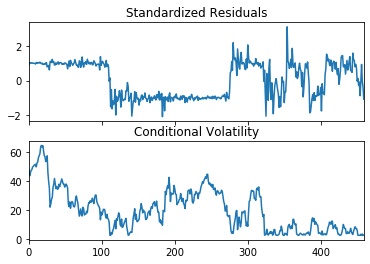

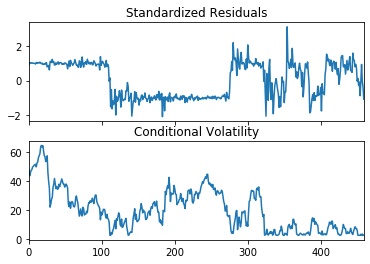

In [2]:
res.plot()

## matlab 实现
牛津大学教授代码：https://pan.baidu.com/s/1N_J_cYhRq-b_jfPaO_qL2g#list/path=%2F

GARCH 估计与残差分布检验
```matlab
% 1.导入数据
data = xlsread('C:\Users\Administrator\Desktop\各市场收益率');
rst   = data(:,2);   %WTI市场现货原始收益率
mldate   = x2mdate(data(:,1)); % 导入日期

% 2.处理汇率收益率序列
epsilon=rst-mean(rst);   %现货原始收益率残差
T=length(epsilon);

% 3.构建GARCH(1,1)模型
options=optimset('fminunc');
 
options=optimset(options,'TolFun',1e-005); 
 
options=optimset(options,'TolX',1e-005); 
 
options=optimset(options,'Display','off'); 
 
options=optimset(options,'Diagnostics','off'); 
 
options=optimset(options,'LargeScale','off');
 
options=optimset(options,'MaxFunEvals',2000);
 
[garch11p,garch11LL,garch11ht,garch11vcvrobust]=tarch(epsilon,1,0,1,'SKEWT',[],[],options);
[garch11text,garch11AIC,garch11BIC]=tarch_display(garch11p,garch11LL,garch11vcvrobust,epsilon,1,2,1);

% 4.检验残差分布选择是否合理(可以利用AIC值、QQ图、KS检验、标准残差做ARCH检验)
% 4.1 KS检验
ehat = epsilon./sqrt(garch11ht);   %标准残差
u = skewtcdf(ehat,garch11p(4,1),garch11p(5,1));     %概率积分变换
v = unifrnd(0,1,T,1);
[H, pValue, KSstatistic] = kstest2(u,v);

% 4.2 QQ图
fig=figure;
set(fig,'Position',[100 100 550 500],'Color',[1 1 1])
y = unifinv((1:T)'/(T+1),0,1);
LB = 0;
UB=1;
h=plot([LB UB],[LB UB],sort(u),y);
set(h(1),'LineStyle','--','Color',[1 0 0],'LineWidth',1)
set(h(2),'LineStyle','none','Marker','o','MarkerSize',1,'Color',[0 0 1])
axis tight
set(gca,'FontSize',16)
a = 'WTI';
title(['' a '原油现货收益率Q-Q图'],'FontSize',16)
xlabel('U(0，1)')
ylabel('残差概率值');

% 4.3 标准残差做ARCH检验,p值高说明无法拒绝原假设(不存在条件异方差)
[h,p,stat,cValue] = archtest(ehat,'lags',10);
if p<=0.01
    arch{1,1} = ['' num2str(stat,'%3.3f') '***'];
    elseif p<=0.05
        arch{1,1} = ['' num2str(stat,'%3.3f') '**'];
    elseif p<=0.1
        arch{1,1} = ['' num2str(stat,'%3.3f') '*'];
    else arch{1,1} = ['' num2str(stat,'%3.3f') ''];
end
```